# Base de Dados:  
 [Inteligência Artificial - Wikipedia](https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial)

In [1]:
import bs4 as bs
import urllib.request 
import nltk
import spacy

from IPython.core.display import HTML

In [2]:
wikipedia_link: str = r'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'
dados = urllib.request.urlopen(wikipedia_link)
type(dados)



http.client.HTTPResponse

In [3]:
# Codigo fonte - Sobreescrever
dados_html: bytes = dados.read()

# Parser do BeautifulSoup
dados_html = bs.BeautifulSoup(dados_html, 'lxml')

In [4]:
### WebScrapping
# Tag de paragrafos <p>  
paragrafos = dados_html.find_all('p') 

Cada elemento `bs4.element.Tag` tem atributos como `text`

In [5]:
paragrafos[0].text

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\n'

In [6]:
conteudo_textual = ''

for paragrafo in paragrafos:
    conteudo_textual += paragrafo.text

# trabalhar com letras minusculas
conteudo_textual = conteudo_textual.lower()    

In [7]:
conteudo_textual

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

## Busca em texto com spaCy

In [8]:
pln = spacy.load("pt_core_news_sm")
key_string = 'turing' # Minuscula de acordo com o conteudo_textual
token_pesquisa = pln(key_string)

In [9]:
from spacy.matcher import PhraseMatcher

matcher: PhraseMatcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [10]:
documento = pln(conteudo_textual)
matches: list[tuple] = matcher(documento)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [11]:
for _, j, k in matches:
    print(documento[j:k+ 5])

turing foi o que se chamou
turing (tt),[34] de 1950
turing quanto o teste de turing
turing talvez derivem da visão que
turing tinha de que o ser
turing, entre o homem e
turing não necessariamente implica um ser
turing”, usado até hoje
turing em 1972 e a medalha
turing, o maior prêmio em
turing. entre suas contribuições para


In [12]:
HTML(f'<h1>{key_string.upper()}</h1>')

In [13]:
numero_palavras: int = 50

doc = pln(conteudo_textual)
matches = matcher(doc)


text_to_HTML =  f"""<p><strong> Resultados encontrados: {len(matches)} </strong></p>"""
texto = ''

display(HTML(f'<h1>{key_string.upper()}</h1>')) # TURING
display(HTML(text_to_HTML))

for i in matches:
    inicio =  i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(key_string, f"<mark> {key_string} </mark>")
    texto += "<br /> <br />"

display(HTML(f"""... {texto} ..."""))




## Extração de _entidades nomeadas_  
- NER (Named-Entity Recognition)
- Encontrar e Classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento>
    - Pessoa, localização, empresa, numéricos
- Usado em _chatbots_ para saber o assunto falado


In [14]:
for entidade in doc.ents:
    print(f"{entidade.text=} | {entidade.label_=}")
    print()



entidade.text='pensamento:[1' | entidade.label_='MISC'

entidade.text='segunda guerra mundial' | entidade.label_='MISC'

entidade.text='alan' | entidade.label_='PER'

entidade.text='herbert simon' | entidade.label_='PER'

entidade.text='allen newell' | entidade.label_='PER'

entidade.text='john mccarthy' | entidade.label_='PER'

entidade.text='warren mcculloch' | entidade.label_='PER'

entidade.text='walter pitts' | entidade.label_='PER'

entidade.text='marvin minsky' | entidade.label_='PER'

entidade.text='frankenstein' | entidade.label_='MISC'

entidade.text='aristóteles' | entidade.label_='PER'

entidade.text='alexandre' | entidade.label_='PER'

entidade.text='herbert simon' | entidade.label_='PER'

entidade.text='john mccarthy' | entidade.label_='PER'

entidade.text='newell' | entidade.label_='PER'

entidade.text='“' | entidade.label_='PER'

entidade.text='”' | entidade.label_='MISC'

entidade.text='humano.[14' | entidade.label_='MISC'

entidade.text='brasil' | entidade.label_='LOC

In [15]:
# Melhorar a visualização
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

## Nuvem de Palavras e _stop words_  

Utilizada para visualizar os termos mais frequentes em um documento.



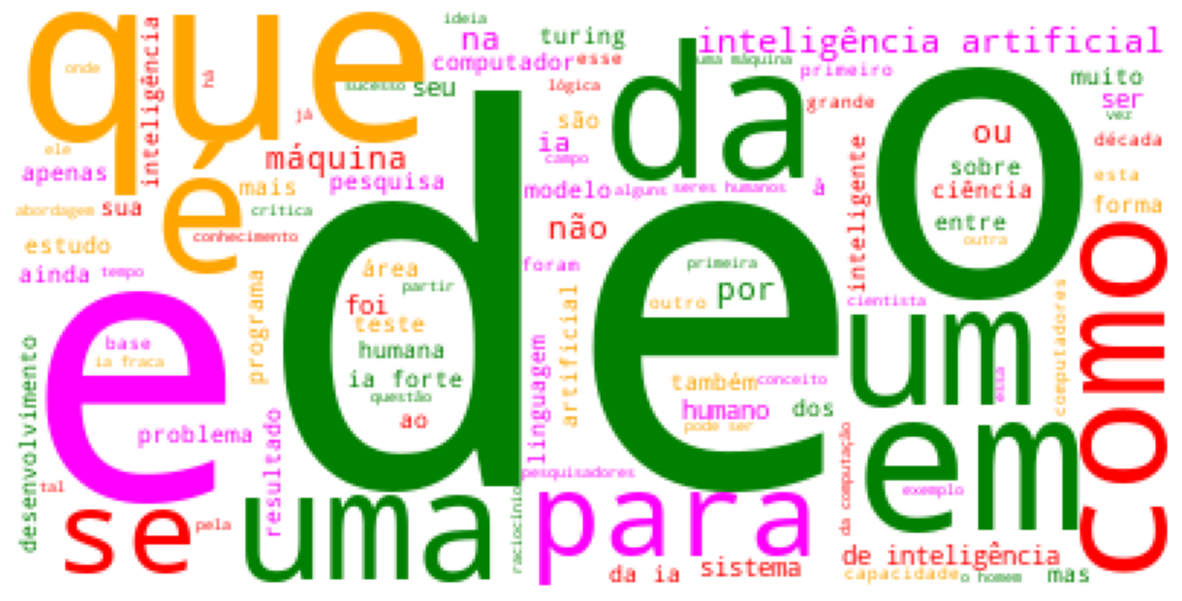

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

cores: list[str] = ['orange', 'green', 'red', 'magenta']
cmap = ListedColormap(colors=cores)


cloud = WordCloud(background_color='white', max_words=100, colormap=cmap)
cloud = cloud.generate(conteudo_textual)

plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Há muitas palavras "irrelevantes"  como "de" "que" "uma". Essas são as _Stop Words_ que a removeremos dessa nuvem de palavras.

In [24]:
from spacy.lang.pt.stop_words import STOP_WORDS


In [34]:
STOP_WORDS

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [35]:
# Percorrer o documento e remover stop words
pln.vocab['agora'].is_stop

True

In [59]:
lista_token: list[str] = []

for token in doc:
    lista_token.append(token.text)

lista_token[:10]

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do']

In [63]:
len(lista_token)

6316

In [60]:
sem_stop: list[str] = []
for i in lista_token:
    if pln.vocab[i].is_stop == False:
        sem_stop.append(i)

In [ ]:
len(sem_stop)

3652

In [67]:
' '.join(sem_stop)

'inteligência artificial ( sigla : ia ; inglês : artificial intelligence , sigla : ai ) campo estudo multidisciplinar abrange varias áreas conhecimento.[1][2 ] conjunto tecnologias permitem aparelhos smart executarem várias funções avançadas modo quase autônomo,[2][3 ] representando marco histórico computação moderna.[3 ] desenvolvimento tenha avançado ciência computação , abordagem interdisciplinar envolve contribuições diversas disciplina . \n principais áreas relacionadas ia incluem : \n difícil definir especificamente inteligência artificial , longo seguiu linhas pensamento:[1 ] \n conceito amplo recebe tantas definições significados diferentes palavra inteligência.[4 ] considerar características básicas desses sistemas , capacidade raciocínio ( aplicar regras lógicas conjunto dados disponíveis chegar conclusão ) , aprendizagem ( aprender erros acertos futuro possa agir maneira eficaz ) , reconhecer padrões ( padrões visuais sensoriais , padrões comportamento ) inferência ( capacid

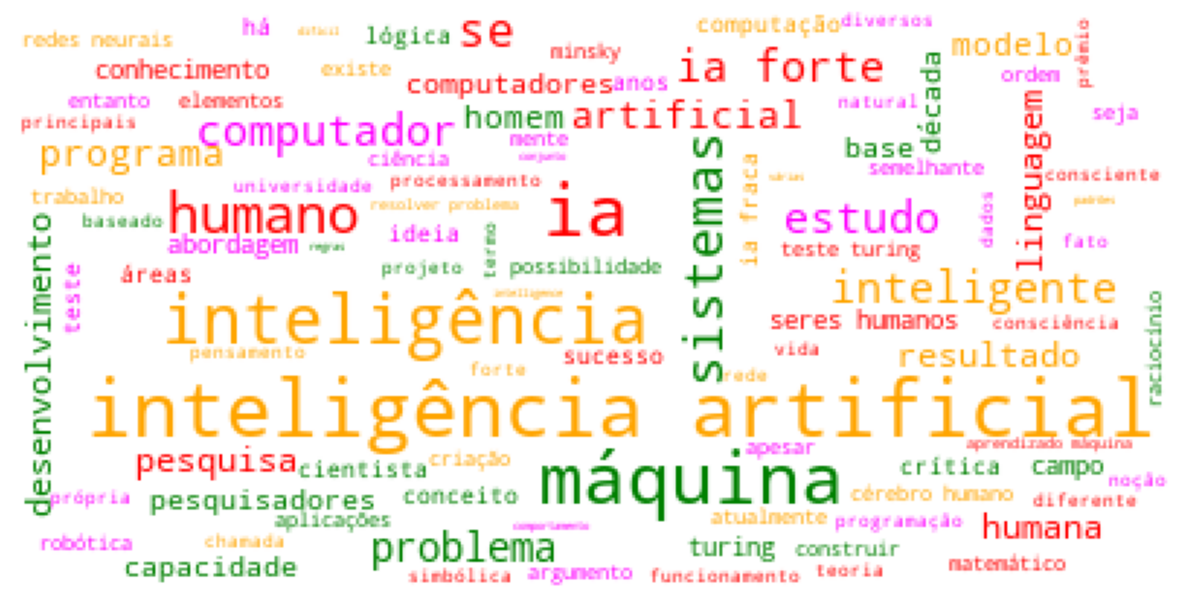

In [70]:
cloud = cloud.generate(' '.join(sem_stop))

plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Agora essa nuvem faz mais sentido